<a href="https://colab.research.google.com/github/Jeetanand/Text-Classification/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Twitter_Data.csv")

In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57853 entries, 0 to 57852
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  57852 non-null  object 
 1   category    57852 non-null  float64
dtypes: float64(1), object(1)
memory usage: 904.1+ KB


In [5]:
df.isna().sum()

clean_text    1
category      1
dtype: int64

In [6]:
df['clean_text'][0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [7]:
df.sample(3)

,clean_text,category
33406,someone against modi may may not anti india bu...,0.0
20005,modis speech for organic food farming and holi...,0.0
9321,lets try new may from bjp modi jee failed all ...,-1.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
category,57852.0,0.21918,0.780822,-1.0,0.0,0.0,1.0,1.0


In [10]:
df['Length'] = df['clean_text'].str.len()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
category,57852.0,0.219180,0.780822,-1.0,0.0,0.0,1.0,1.0
Length,57852.0,122.869322,67.716401,2.0,65.0,112.0,181.0,271.0


<Axes: >

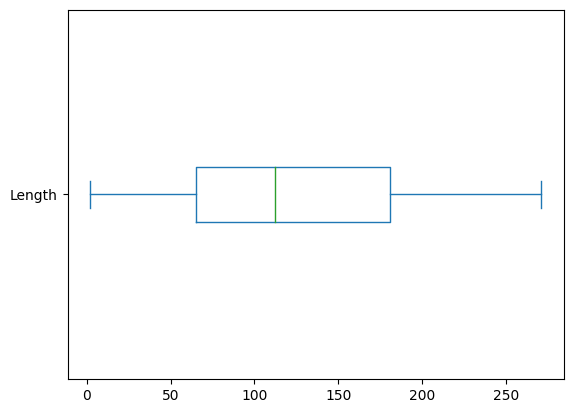

In [12]:
df['Length'].plot(kind='box', vert=False)

<Axes: ylabel='Frequency'>

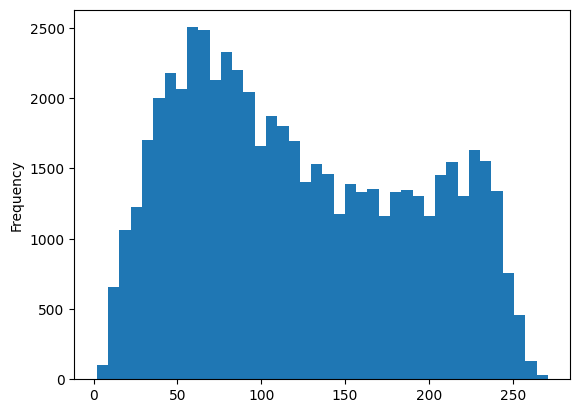

In [13]:
df['Length'].plot(kind='hist',bins =40)

<Axes: >

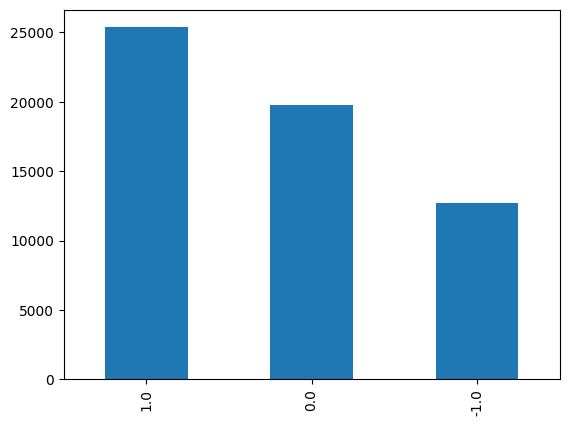

In [14]:
df['category'].value_counts().plot(kind='bar')

In [16]:
df = df.dropna()

In [17]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

#defining funtion to plot wordcloud on any given corpous

def wordcloud_show(Review):
    text = " ".join(review for review in Review)

   # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="White").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


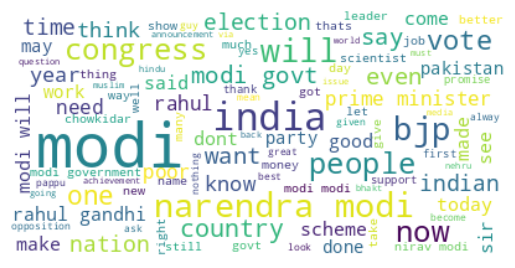

In [18]:
wordcloud_show(df.clean_text)

In [32]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    #replacing non-charcter with ' '
    review = re.sub('[^a-zA-Z]', ' ', text)
    #converting into lower case
    review = review.lower()
    #spliting string into text
    review = review.split()
    #removinf stop-words
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)

    return review

In [34]:

df['Preprocessed'] = df['clean_text'].apply(lambda x: preprocess(x))

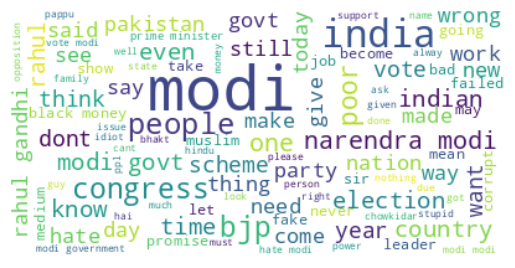

In [36]:
wordcloud_show(df.Preprocessed[df.category == -1.0])

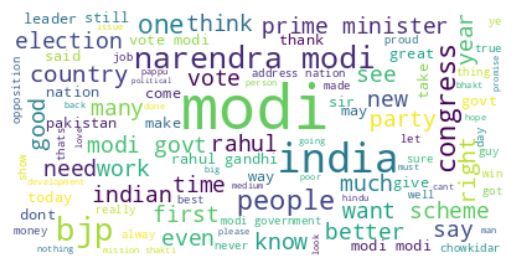

In [37]:
wordcloud_show(df.Preprocessed[df.category == 1.0])

In [38]:
df.drop(df.index[(df["category"] == 0.0)],axis=0,inplace=True)

<Axes: >

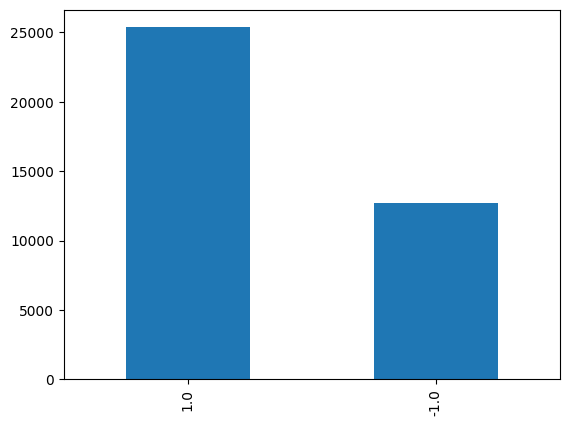

In [39]:
df['category'].value_counts().plot(kind='bar')